In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Importing Classifier Modules
from sklearn.ensemble import RandomForestClassifier

#For confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

#Firstly, we shoud study input data

#Loading data 
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

#Look what data we have
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
test_data.shape #number of rows and columns in the test set

(418, 11)

In [3]:
train_data.shape #number of rows and columns in the train set

(891, 12)

Text(0.5, 1.0, 'Missing values in a dataset')

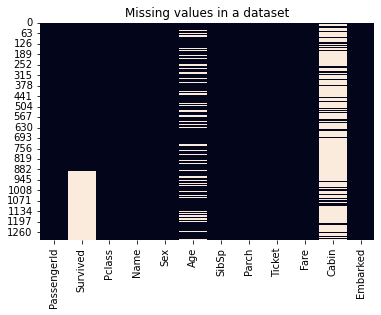

In [4]:
#Define how many values are skipped
data = pd.concat([train_data, test_data], ignore_index=True, sort = False)

sns.heatmap(data.isnull(), cbar = False).set_title("Missing values in a dataset")

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Find out how many values of parameters we have in dataset
data.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [7]:
#Count how many people survived
survived = train_data[train_data['Survived'] == 1]
not_survived = train_data[train_data['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train_data)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train_data)*100.0))
print ("Total: %i"%len(train_data))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


In [8]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
#More women survived than men

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_data.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

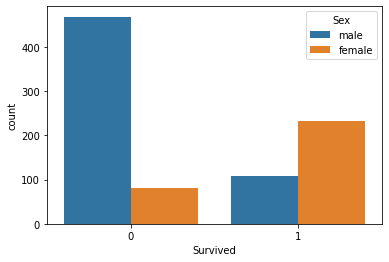

In [11]:
sns.countplot(x='Survived', hue='Sex', data=train_data) 

In [12]:
#We have three values of class - 1,2,3
train_data.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Text(0.5, 1.0, 'The number of survivors in each class')

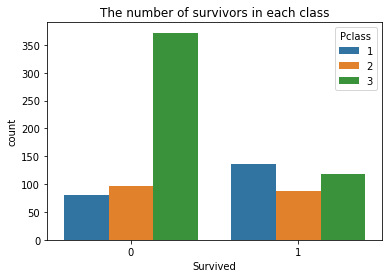

In [13]:
sns.countplot(x='Survived', hue='Pclass', data=train_data).set_title("The number of survivors in each class")
#More people died in the third class

In [14]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
tab = pd.crosstab(train_data['Pclass'], train_data['Sex'])
print (tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0.5, 1.0, 'Sex ratio in each class')

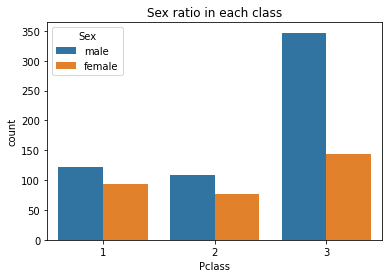

In [16]:
sns.countplot(x='Pclass', hue='Sex', data=train_data).set_title("Sex ratio in each class")

In [17]:
train_data[['Sex', 'Survived','Pclass']].groupby(['Sex','Pclass'], as_index=False).mean()

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


Text(0.5, 1.0, 'Female survived in class')

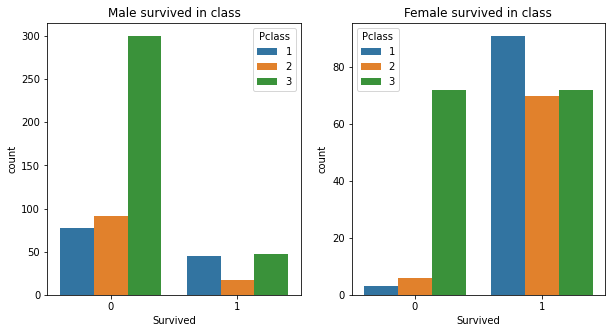

In [18]:
male = train_data[(train_data['Sex']=="male")]
female = train_data[(train_data['Sex']=="female")]

plt.figure(figsize=[10,5])
plt.subplot(121)

sns.countplot(x='Survived', hue='Pclass', data=male).set_title("Male survived in class")
plt.subplot(122)

sns.countplot(x='Survived', hue='Pclass', data=female).set_title("Female survived in class")

In [19]:
#Most of the women were saved from 1 and 2 class
train_data.Embarked.value_counts()
#Most of the people settled in the first port

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
#Embarked - Landing place
#S - Southampton - first, 
#С - Cherbourg - second one,
#Q - Queenstown - the last one.
train_data.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

Text(0.5, 1.0, 'The dependence of survival on the port')

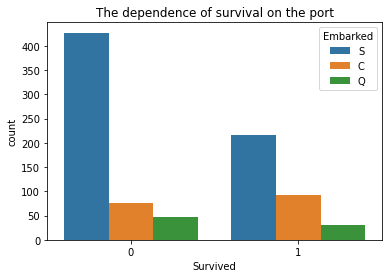

In [21]:
sns.countplot(x='Survived', hue='Embarked', data=train_data).set_title("The dependence of survival on the port")
#Most of those who landed in the first port died

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


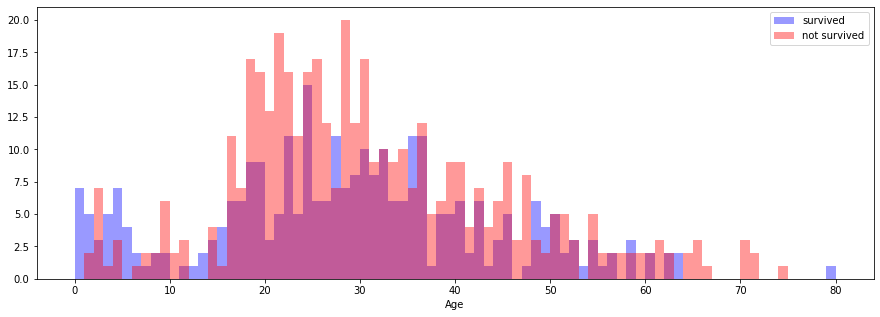

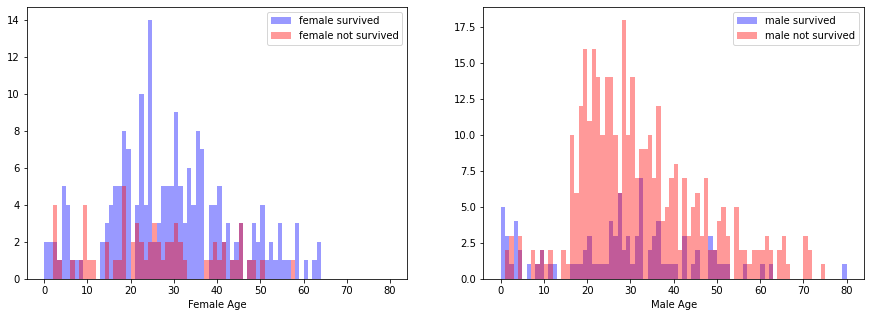

In [22]:
#The impact of age on survival
total_survived = train_data[train_data['Survived']==1]
total_not_survived = train_data[train_data['Survived']==0]
male_survived = train_data[(train_data['Survived']==1) & (train_data['Sex']=="male")]
female_survived = train_data[(train_data['Survived']==1) & (train_data['Sex']=="female")]
male_not_survived = train_data[(train_data['Survived']==0) & (train_data['Sex']=="male")]
female_not_survived = train_data[(train_data['Survived']==0) & (train_data['Sex']=="female")]


plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')
plt.legend(["survived", "not survived"])


plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')
plt.legend(["female survived", "female not survived"])

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')
plt.legend(["male survived", "male not survived"])

In [23]:
#Women mostly survived
#Creating a new feature
data=[train_data,test_data]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


<AxesSubplot:xlabel='FamilySize', ylabel='count'>

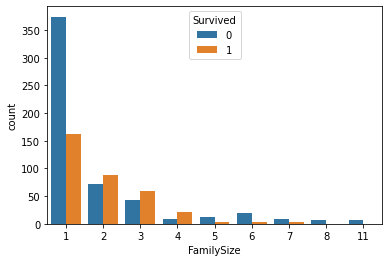

In [24]:
sns.countplot(x='FamilySize', hue='Survived', data=train_data)

In [25]:
#Data preparation
data=([train_data,test_data])

In [26]:
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs


In [27]:
train_data.groupby('Title').Sex.value_counts()


Title     Sex   
Capt      male        1
Col       male        2
Countess  female      1
Don       male        1
Dr        male        6
          female      1
Jonkheer  male        1
Lady      female      1
Major     male        2
Master    male       40
Miss      female    182
Mlle      female      2
Mme       female      1
Mr        male      517
Mrs       female    125
Ms        female      1
Rev       male        6
Sir       male        1
Name: Sex, dtype: int64

In [28]:
#Replacing gender with numeric values
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1})

In [29]:
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','Master'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [30]:
#Replacing gender with numeric values
for dataset in data:
    dataset['Title'] = dataset['Title'].map({'Miss': 0, 'Mr': 1,'Mrs': 2, 'Other': 60})

In [31]:
train_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,2


In [32]:
#Replace the missing values for the landing parameter with S, because most people boarded the ship in this port
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [33]:
#Replace char to int
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [34]:
train_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2,2


In [35]:
#Create a new value - FamilySize
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [36]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2,2,0


In [37]:
for dataset in data:
    dataset['S'] = 0
    dataset['C'] = 0
    dataset['Q'] = 0
    dataset.loc[dataset['Embarked'] == 0, 'S'] = 1
    dataset.loc[dataset['Embarked'] == 1, 'C'] = 1
    dataset.loc[dataset['Embarked'] == 2, 'Q'] = 1
    dataset['First_Class'] = 0
    dataset['Second_Class'] = 0
    dataset['Third_Class'] = 0
    dataset.loc[dataset['Pclass'] == 1, 'First_Class'] = 1
    dataset.loc[dataset['Pclass'] == 2, 'Second_Class'] = 1
    dataset.loc[dataset['Pclass'] == 3, 'Third_Class'] = 1
train_data.head(2)    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilySize,Title,IsAlone,S,C,Q,First_Class,Second_Class,Third_Class
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,2,1,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,1,2,2,0,0,1,0,1,0,0


In [38]:
#Adding new age values
for dataset in data:
    age_avg = dataset['Age'].mean() 
    age_std = dataset['Age'].std() 
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)  
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train_data['AgeBand'] = pd.cut(train_data['Age'], 5) #Divide into equal groups of 20%

print (train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.504425
1   (16.0, 32.0]  0.359268
2   (32.0, 48.0]  0.371648
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
#Replacing the age with the group
for dataset in data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,Title,IsAlone,S,C,Q,First_Class,Second_Class,Third_Class,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,...,2,1,0,1,0,0,0,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,71.2833,...,2,2,0,0,1,0,1,0,0,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,...,1,0,1,1,0,0,0,0,1,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,...,2,2,0,1,0,0,1,0,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,...,1,1,1,1,0,0,0,0,1,"(32.0, 48.0]"


In [40]:
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(train_data['Fare'].median())
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4) #Divide into equal groups of 25%, 50%, 75%

print (train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [41]:
#Coding the fage
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 14), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,IsAlone,S,C,Q,First_Class,Second_Class,Third_Class,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,1.0,...,1,0,1,0,0,0,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3.0,...,2,0,0,1,0,1,0,0,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1.0,...,0,1,1,0,0,0,0,1,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3.0,...,2,0,1,0,0,1,0,0,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1.0,...,1,1,1,0,0,0,0,1,"(32.0, 48.0]","(7.91, 14.454]"


In [42]:
for dataset in data:
    dataset['F1'] = 0
    dataset['F2'] = 0
    dataset['F3'] = 0
    dataset['F4'] = 0    
    dataset.loc[dataset['Fare'] == 0, 'F1'] = 1
    dataset.loc[dataset['Fare'] == 1, 'F2'] = 1
    dataset.loc[dataset['Fare'] == 2, 'F3'] = 1
    dataset.loc[dataset['Fare'] == 3, 'F4'] = 1    
train_data.head(2)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Q,First_Class,Second_Class,Third_Class,AgeBand,FareBand,F1,F2,F3,F4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,1.0,...,0,0,0,1,"(16.0, 32.0]","(-0.001, 7.91]",0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3.0,...,0,1,0,0,"(32.0, 48.0]","(31.0, 512.329]",0,0,0,1


In [43]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,S,C,Q,First_Class,Second_Class,Third_Class,F1,F2,F3,F4
0,892,3,"Kelly, Mr. James",1,2,0,0,330911,1.0,NaN,...,0,0,1,0,0,1,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2,1,0,363272,0.0,NaN,...,1,0,0,0,0,1,1,0,0,0


In [44]:
#Deleting unnecessary data
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket','Cabin','Pclass','Embarked','Fare']
train = train_data.drop(features_drop, axis=1)
test = test_data.drop(features_drop, axis=1)
train = train_data.drop(['PassengerId', 'AgeBand','Name', 'SibSp', 'Parch', 'Ticket','FareBand','Cabin','Pclass','Embarked','Fare'], axis=1)

In [45]:
test.head(3)

,PassengerId,Sex,Age,FamilySize,Title,IsAlone,S,C,Q,First_Class,Second_Class,Third_Class,F1,F2,F3,F4
0,892,1,2,1,1,1,0,0,1,0,0,1,0,1,0,0
1,893,0,2,2,2,0,1,0,0,0,0,1,1,0,0,0
2,894,1,3,1,1,1,0,0,1,0,1,0,0,1,0,0


In [46]:
train.head(3)

,Survived,Sex,Age,FamilySize,Title,IsAlone,S,C,Q,First_Class,Second_Class,Third_Class,F1,F2,F3,F4
0,0,1,1,2,1,0,1,0,0,0,0,1,0,1,0,0
1,1,0,2,2,2,0,0,1,0,1,0,0,0,0,0,1
2,1,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0


In [47]:
#X_train - train data 
#y_train - answer for train data
#X_test - test data 
#y_test - we need to find it
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

In [48]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

88.66


Accuracy: 88 % 

                   Predicted Survived  Predicted Not Survived
True Survived                     506                      43
True Not Survived                  58                     284


<AxesSubplot:>

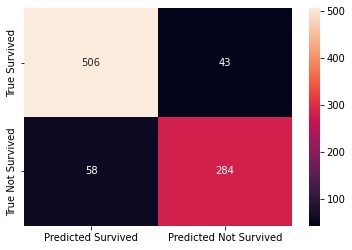

In [49]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)
print(df_cnf_matrix)


sns.heatmap(df_cnf_matrix, annot=True, fmt='d')


In [50]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_random_forest
    })
submission.to_csv('submission.csv', index=False)
submission.Survived = submission.Survived.astype(int)